Równanie oscylatora harmonicznego z tłumieniem i wymuszeniem.

Wykres dla kilku parametrów tłumienia i częstości wymuszenia.

Następnie należy rozwiązać równania i również wykonać ich wykresy.

## 1. Theory

Equation of harmonic oscilator presents as
$$
m \ddot{x} = -k x,
$$
where $ k $ is constant.

Solution of harmonic osiclator is
$$
x(t) = A \sin{(\omega t + \phi)},
$$
where $ \omega = \sqrt{\frac{k}{m}} $ and $ \phi $ is starting phase.

---

Equation of damped harmonic oscilator is
$$
m \ddot{x} = -k x - c \dot{x},
$$
where $ c $ is viscous damping coefficient.

$$
    \zeta = \frac{c}{2\sqrt{mk}}
$$
$\zeta>1$ - Overdumped

$ \zeta = 1 $ - Critically dumped

$ \zeta < 1 $ - Underdumped

---

Equation of driven harmonic oscilator is
$$
m \ddot{x} = F(t) -k x - c \dot{x},
$$
where $ F(t) $ is external applied force.

## 2. Code 

In [34]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing(use_latex='mathjax')

### 2.1 Damped oscillator

In [35]:
m, t, k, c = sp.symbols('m t k c')
x = sp.Function('x')

m, t, k, c, x(t)

(m, t, k, c, x(t))

In [36]:
dumped_osc_eq = sp.Eq(m * x(t).diff(t, 2) + c * x(t).diff(t) + k * x(t), 0)
dumped_osc_eq

                         2           
  d                     d            
c⋅──(x(t)) + k⋅x(t) + m⋅───(x(t)) = 0
  dt                      2          
                        dt           

Oscilator starts at $x = 1$ with speed $v(t)=0$

In [37]:
sol_dumped = sp.dsolve(dumped_osc_eq, x(t), ics={x(0): 1, x(t).diff(t).subs(t, 0): 0})
sol_dumped

                                     ⎛       ____________⎞                     ↪
                                     ⎜      ╱  2         ⎟                     ↪
                                  -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠                     ↪
                                  ─────────────────────────                    ↪
       ⎛          c           1⎞             2⋅m              ⎛        c       ↪
x(t) = ⎜- ───────────────── + ─⎟⋅ℯ                          + ⎜─────────────── ↪
       ⎜       ____________   2⎟                              ⎜     __________ ↪
       ⎜      ╱  2             ⎟                              ⎜    ╱  2        ↪
       ⎝  2⋅╲╱  c  - 4⋅k⋅m     ⎠                              ⎝2⋅╲╱  c  - 4⋅k⋅ ↪

↪            ⎛        ____________⎞
↪            ⎜       ╱  2         ⎟
↪          t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠
↪          ────────────────────────
↪      1⎞            2⋅m           
↪ ── + ─⎟⋅ℯ                        
↪ __   2⎟                          
↪       ⎟         

In [38]:
def return_zeta(c, m, k):
    return c / (2 * sp.sqrt(m * k))

In [65]:
cs = np.array([0, 0.25, 2, 4.0001, 6, 8])
ms = 1.0
ks = 4.0

return_zeta(cs, ms, ks)

array([0, 0.0625000000000000, 0.500000000000000, 1.00002500000000,
       1.50000000000000, 2.00000000000000], dtype=object)

In [61]:
sol_dumped.rhs.subs({c: 0, m: 1, k: 4}).simplify()

cos(2⋅t)

In [68]:
solutions = []

In [69]:
for ci in cs:
    print(ci)
    solf = sp.lambdify(t, sol_dumped.rhs.subs({c: ci, m: ms, k: ks}))
    solutions.append(solf)

0.0
0.25
2.0
4.0001
6.0
8.0


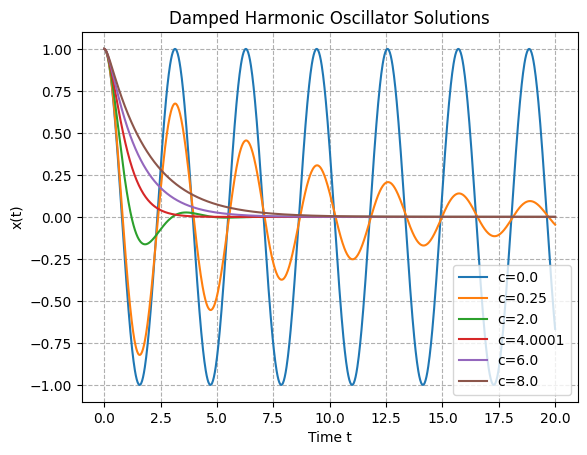

In [71]:
ts = np.linspace(0, 20, 1000)
for i, ci in enumerate(cs):
    solf = solutions[i]
    plt.plot(ts, solf(ts), label=f'c={ci}')
plt.title('Damped Harmonic Oscillator Solutions')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.grid(ls='--')
plt.legend()

### 2.2 Driven harmonic oscillator

In [75]:
m, t, k, c, omega = sp.symbols('m t k c omega')
x = sp.Function('x')
F = sp.Function('F')

m, t, k, c, omega, x(t), F(t)

(m, t, k, c, ω, x(t), F(t))

In [76]:
driven_osc_eq = sp.Eq(m * x(t).diff(t, 2) + c * x(t).diff(t) + k * x(t) - F(t), 0)
driven_osc_eq

                         2                  
  d                     d                   
c⋅──(x(t)) + k⋅x(t) + m⋅───(x(t)) - F(t) = 0
  dt                      2                 
                        dt                  

In [77]:
F_t = sp.cos(omega * t)
F_t

cos(ω⋅t)

In [79]:
driven_osc_eq = driven_osc_eq.subs(F(t), F_t)
driven_osc_eq

                         2                      
  d                     d                       
c⋅──(x(t)) + k⋅x(t) + m⋅───(x(t)) - cos(ω⋅t) = 0
  dt                      2                     
                        dt                      

In [82]:
sol_driven = sp.dsolve(driven_osc_eq, x(t), ics={x(0): 1, x(t).diff(t).subs(t, 0): 0})
sol_driven

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
               c⋅ω⋅sin(ω⋅t)                     k⋅cos(ω⋅t)                     ↪
x(t) = ───────────────────────────── + ───────────────────────────── - ─────── ↪
        2  2    2          2    2  4    2  2    2          2    2  4    2  2   ↪
       c ⋅ω  + k  - 2⋅k⋅m⋅ω  + m ⋅ω    c ⋅ω  + k  - 2⋅k⋅m⋅ω  + m ⋅ω    c ⋅ω  + ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪                          ⎛                                                   ↪
↪     2                    

In [138]:
cs = 0.1
ms = 1.0
ks = 4.0
omegas = np.array([0.25, 0.5, 1, 2, 3.0])* sp.pi

return_zeta(cs, ms, ks)

0.0250000000000000

In [139]:
solutions = []

for omegai in omegas:
    print(omegai)
    solf = sp.lambdify(t, sol_dumped.rhs.subs({c: cs, m: ms, k: ks, omega: omegai}))
    solutions.append(solf)

0.25*pi
0.5*pi
1.0*pi
2.0*pi
3.0*pi


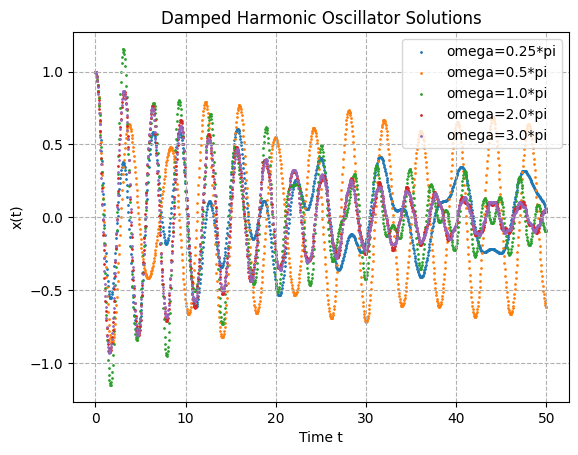

In [140]:
ts = np.linspace(0, 50, 1000)
for i, omegai in enumerate(omegas):
    solf = solutions[i]
    plt.scatter(ts, solf(ts), label=f'omega={omegai}', s=1)
plt.title('Damped Harmonic Oscillator Solutions')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.grid(ls='--')
plt.legend()